# Socioeconomic Climate Impact Analysis System

In [ ]:
# General
import os
import pandas as pd
import numpy as np


import geopandas as gpd


import matplotlib.pyplot as plt


/home/lokraj/OMDENA/capstone-project-lokraj/.conda/lib/python3.10/site-packages/pyproj/network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


In [2]:
# Base data directory
base_dir = "../data/Socioeconomic/"

# Create subdirectories
dirs = [f"{base_dir}raw_data", f"{base_dir}clean_data", f"{base_dir}output", f"{base_dir}figures"]

for d in dirs:
    os.makedirs(d, exist_ok=True)

print("Directory structure created under", base_dir)


Directory structure created under ../data/Socioeconomic/


## load raw dataset

In [3]:
# File paths
agriculture_path = f"{base_dir}raw_data/area-production-and-yield-of-cash-crops-in-nepal.csv"
population_path = f"{base_dir}raw_data/population-by-sex-households-average-household-size-and-area-in-sq.km.-2011-by-districts.csv"
infrastructure_path = f"{base_dir}raw_data/preliminary-data-of-national-population-and-housing-census-2021-english.csv"
economic_loss_area_path = f"{base_dir}raw_data/area-of-land-made-uncultivable-due-to-flooding-soil-erosion-by-ecological-belt-nepal.csv"
economic_loss_disaster_path = f"{base_dir}raw_data/major-disasters-in-nepal-and-the-damage-and-loss-1971-2015.csv"

# Load
df_agriculture = pd.read_csv(agriculture_path)
df_population = pd.read_csv(population_path)
df_infrastructure = pd.read_csv(infrastructure_path)
df_economic_area = pd.read_csv(economic_loss_area_path)
df_economic_disaster = pd.read_csv(economic_loss_disaster_path)

print("Datasets loaded successfully.")


Datasets loaded successfully.


In [4]:
# Quick look
display(df_agriculture.head())
display(df_population.head())
display(df_infrastructure.head())
display(df_economic_area.head())
display(df_economic_disaster.head())


,CROP,YEAR,YIELD,AREA,PRODUCTION
0,OILSEED \n,1990/91,156310.0,92140.0,589.0
1,OILSEED \n,1991/92,154570.0,87840.0,568.0
2,OILSEED \n,1992/93,165240.0,93690.0,567.0
3,OILSEED \n,1993/94,177486.0,107535.0,606.0
4,OILSEED \n,1994/95,184460.0,116300.0,630.0


,Districts,Households,Average Household Size,Male,Female,Area in Sq. KM,Total Population
0,Taplejung,26509,4.81,60552,66909,3646,127461
1,Panchthar,41196,4.66,90186,101631,1241,191817
2,Ilam,64502,4.50,141126,149128,1703,290254
3,Jhapa,184552,4.40,385096,427554,1606,812650
4,Morang,213997,4.51,466712,498658,1855,965370


,District,Local Level Name,Total family number,Total household number,Total population,Total Male,Total Female
0,Taplejung,Aathrai Tribeni Rural Municipality,2869,2735,12288,6005,6283
1,Taplejung,Maiwakhola Rural Municipality,2275,2178,10365,5264,5101
2,Taplejung,Meringden Rural Municipality,2683,2528,12040,6181,5859
3,Taplejung,Mikwakhola Rural Municipality,1862,1792,7991,4000,3991
4,Taplejung,Phaktanglung Rural Municipality,2864,2700,11925,6239,5686


,ECOLOGICAL BELT,Total Area (ha),Affected Area (ha),Percentage of affected area,Soil Erosion,Chemical Degradation,Physical Degradation
0,Mountain,213931.5,3512.3,1.64,1848.6,32.1,1631.6
1,Hill,986073.2,18764.5,1.90,11679.6,414.9,6670.0
2,Terai,1325634.5,34394.9,2.59,23643.4,1485.5,9266.0
3,Total,2525639.2,56671.7,2.24,37171.6,1932.5,17567.6


,Disaster type,No. of death,No. of persons missing,No. of persons injured,No. of houses damaged or destroyed,No of affected families,No. of incidents
0,Epidemic,16564,0,43076,0,512970,3448
1,Earthquake,9771,0,29142,982855,890995,175
2,Landslide,4832,165,1727,32819,556774,3012
3,Flood,4344,6,527,215427,3702942,3720
4,Fire,1541,0,1379,83527,256445,7187


## Cleaning & Preprocessing

In [6]:
# --- Agriculture Dataset ---
df_agriculture.columns = df_agriculture.columns.str.strip()
df_agriculture.dropna(inplace=True)

# FIX: Clean the YEAR column
df_agriculture['YEAR'] = df_agriculture['YEAR'].astype(str).str.extract(r'(\d{4})').astype(int)


# --- Population Dataset ---
df_population.columns = df_population.columns.str.strip()
df_population.fillna(method='ffill', inplace=True)  # Forward fill missing

# --- Infrastructure Dataset ---
df_infrastructure.columns = df_infrastructure.columns.str.strip()
df_infrastructure.fillna(method='ffill', inplace=True)

# --- Economic Loss: Area Affected Dataset ---
df_economic_area.columns = df_economic_area.columns.str.strip()
df_economic_area.fillna(0, inplace=True)

# --- Economic Loss: Disaster Dataset ---
df_economic_disaster.columns = df_economic_disaster.columns.str.strip()
df_economic_disaster.fillna(0, inplace=True)

print("Cleaning complete.")


Cleaning complete.


/tmp/ipykernel_17436/1178570423.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_population.fillna(method='ffill', inplace=True)  # Forward fill missing
/tmp/ipykernel_17436/1178570423.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_infrastructure.fillna(method='ffill', inplace=True)


## save cleaned dataset

In [7]:
# Save cleaned datasets
df_agriculture.to_csv(f"{base_dir}clean_data/agricultural_yield_clean.csv", index=False)
df_population.to_csv(f"{base_dir}clean_data/population_data_clean.csv", index=False)
df_infrastructure.to_csv(f"{base_dir}clean_data/infrastructure_data_clean.csv", index=False)
df_economic_area.to_csv(f"{base_dir}clean_data/economic_loss_area_clean.csv", index=False)
df_economic_disaster.to_csv(f"{base_dir}clean_data/economic_loss_disaster_clean.csv", index=False)

print("Cleaned datasets saved under clean_data/.")


Cleaned datasets saved under clean_data/.


# Phase 2 Exploratory Data Analysis (EDA)


This notebook includes:
- Summary statistics
- Visualizations
- Correlation and trend analysis


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

base_dir = "../data/Socioeconomic/clean_data/"

# Load cleaned data
df_agriculture = pd.read_csv(f"{base_dir}agricultural_yield_clean.csv")
df_population = pd.read_csv(f"{base_dir}population_data_clean.csv")
df_infrastructure = pd.read_csv(f"{base_dir}infrastructure_data_clean.csv")
df_economic_area = pd.read_csv(f"{base_dir}economic_loss_area_clean.csv")
df_economic_disaster = pd.read_csv(f"{base_dir}economic_loss_disaster_clean.csv")

print("All datasets loaded.")


All datasets loaded.


In [10]:
# Agriculture Summary
print("Agriculture Yield Summary:")
display(df_agriculture.describe(include='all'))

# Population Summary
print("Population Data Summary:")
display(df_population.describe(include='all'))

# Economic Loss Summary
print("Economic Loss Summary:")
display(df_economic_disaster.describe(include='all'))


Agriculture Yield Summary:


,CROP,YEAR,YIELD,AREA,PRODUCTION
count,144,144.000000,144.000000,1.440000e+02,144.000000
unique,6,NaN,NaN,NaN,NaN
top,OILSEED \n,NaN,NaN,NaN,NaN
freq,24,NaN,NaN,NaN,NaN
mean,NaN,2001.500000,66041.383542,6.467027e+05,8880.706250
std,NaN,6.946348,74125.509229,9.552893e+05,13889.548284
min,NaN,1990.000000,16.000000,1.200000e+01,341.000000
25%,NaN,1995.750000,3779.750000,3.687250e+03,833.000000
50%,NaN,2001.500000,23980.000000,5.342000e+04,1189.500000
75%,NaN,2007.250000,136362.500000,1.291778e+06,10907.750000


Population Data Summary:


,Districts,Households,Average Household Size,Male,Female,Area in Sq. KM,Total Population
count,75,75.000000,75.0000,75.000000,75.000000,75.000000,7.500000e+01
unique,75,NaN,NaN,NaN,NaN,NaN,NaN
top,Taplejung,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,72364.026667,4.9028,171320.546667,181939.506667,1962.413333,3.532601e+05
std,NaN,62179.344175,0.6247,144562.532620,139678.593003,1147.090810,2.837822e+05
min,NaN,1480.000000,3.9200,3661.000000,2877.000000,119.000000,6.538000e+03
25%,NaN,35171.500000,4.4150,76214.000000,86332.000000,1284.000000,1.655680e+05
50%,NaN,59215.000000,4.7800,120995.000000,145340.000000,1692.000000,2.686130e+05
75%,NaN,95154.500000,5.3700,241168.500000,251385.500000,2309.500000,4.917055e+05


Economic Loss Summary:


,Disaster type,No. of death,No. of persons missing,No. of persons injured,No. of houses damaged or destroyed,No of affected families,No. of incidents
count,14,14.000000,14.000000,14.000000,1.400000e+01,1.400000e+01,14.000000
unique,14,NaN,NaN,NaN,NaN,NaN,NaN
top,Epidemic,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,5752.000000,44.285714,11198.142857,1.901304e+05,8.474303e+05,3196.000000
std,NaN,11010.994282,93.068567,23377.971284,4.193344e+05,1.760233e+06,5914.576349
min,NaN,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,2.000000
25%,NaN,33.750000,0.000000,0.500000,0.000000e+00,1.250000e+00,16.250000
50%,NaN,1297.000000,0.000000,305.000000,4.790000e+02,4.744000e+03,947.500000
75%,NaN,4710.000000,6.750000,2264.750000,7.085000e+04,5.458230e+05,3339.000000


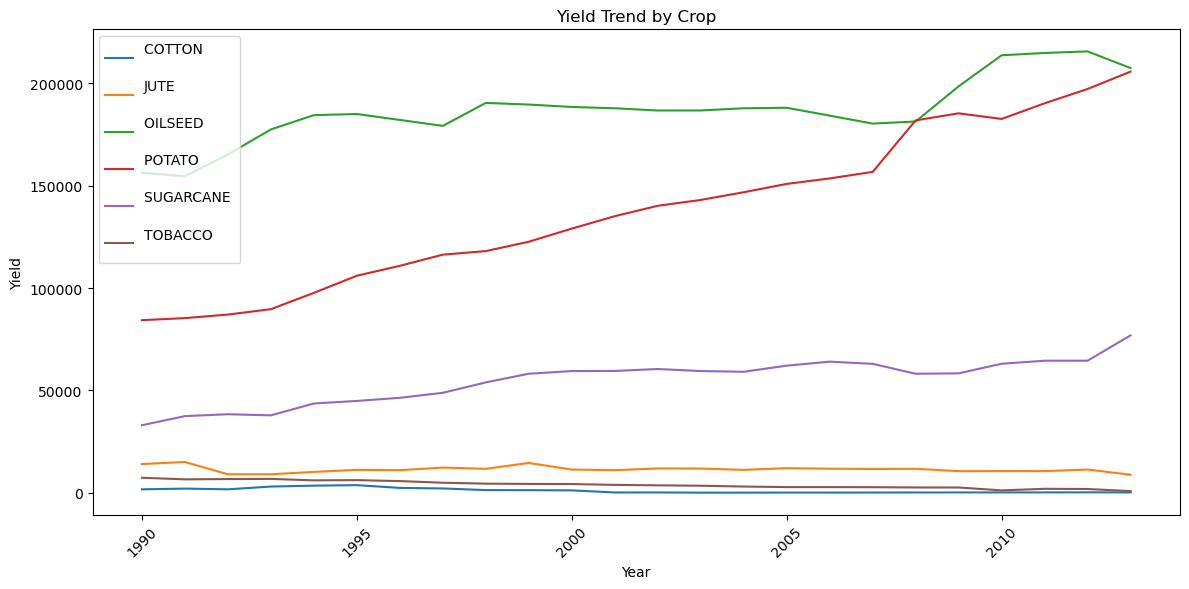

In [11]:
# Group by Crop and Year
agg_crop = df_agriculture.groupby(['CROP', 'YEAR']).agg({
    'YIELD': 'mean',
    'PRODUCTION': 'sum',
    'AREA': 'sum'
}).reset_index()

# Plot Yield trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=agg_crop, x='YEAR', y='YIELD', hue='CROP')
plt.title("Yield Trend by Crop")
plt.ylabel("Yield")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.tight_layout()
plt.show()


/tmp/ipykernel_17436/3433639061.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_pop, x='Districts', y='Total Population', palette='viridis')


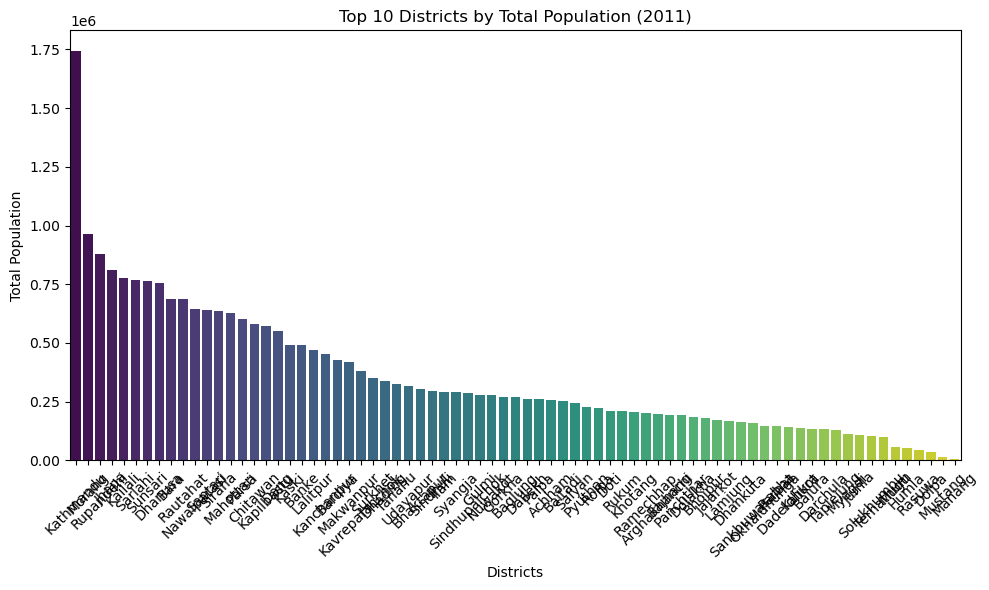

In [13]:
# Clean column names for consistency
df_population.columns = df_population.columns.str.strip()
df_population['Total Population'] = pd.to_numeric(df_population['Total Population'], errors='coerce')

# Top 10 districts by population
top_pop = df_population.sort_values('Total Population', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=top_pop, x='Districts', y='Total Population', palette='viridis')
plt.title("Top 10 Districts by Total Population (2011)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### economic damage over time

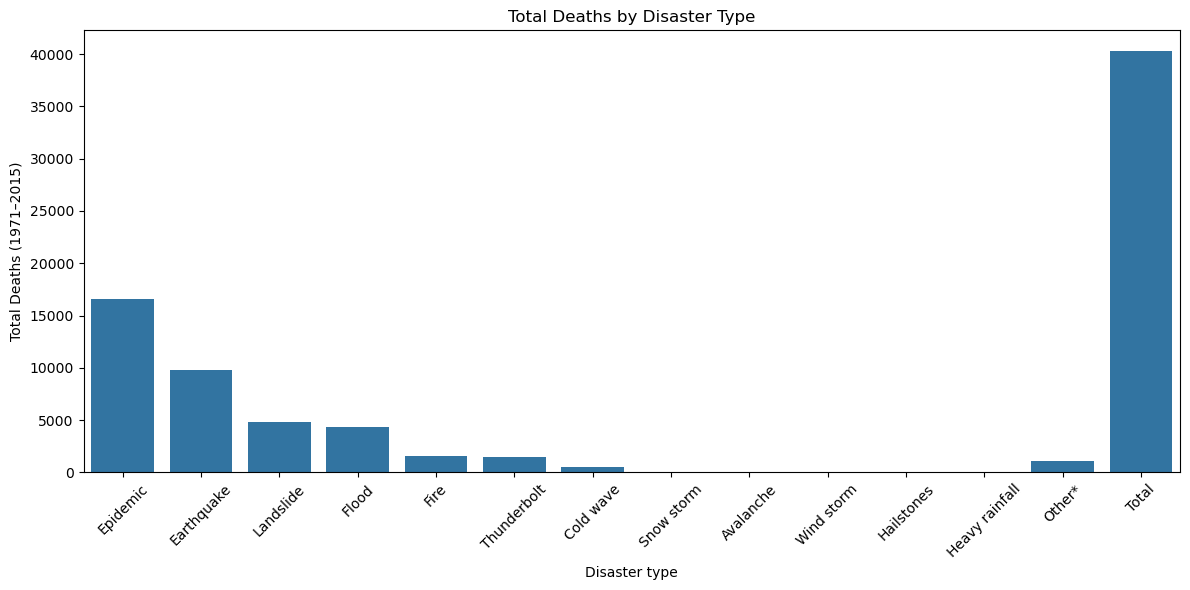

In [18]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_economic_disaster, x='Disaster type', y='No. of death', estimator=sum)
plt.title("Total Deaths by Disaster Type")
plt.ylabel("Total Deaths (1971–2015)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Correlation Matrix 

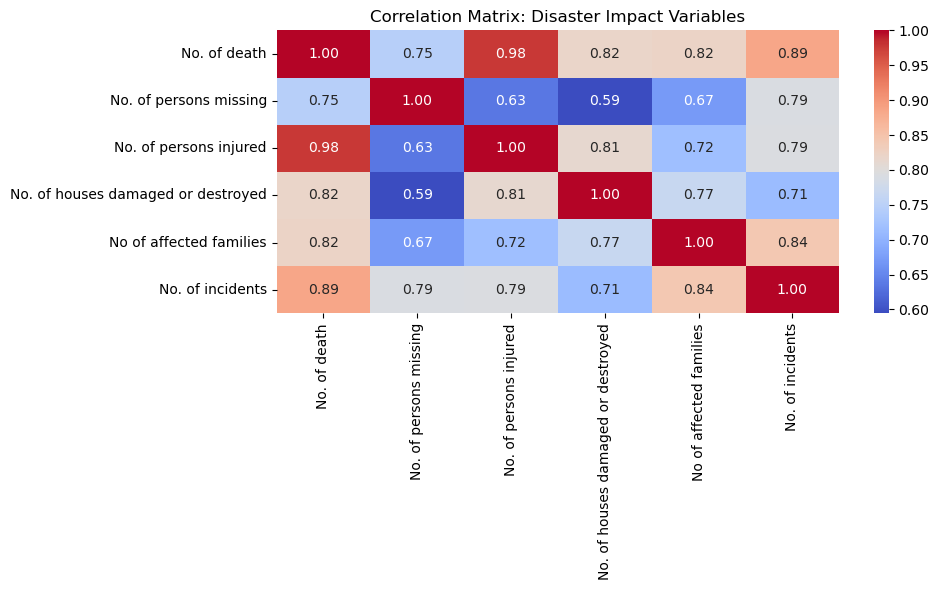

In [20]:
# Economic dataset correlation
plt.figure(figsize=(10,6))
sns.heatmap(df_economic_disaster.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix: Disaster Impact Variables")
plt.tight_layout()
plt.show()


### Missing Data Heatmap 

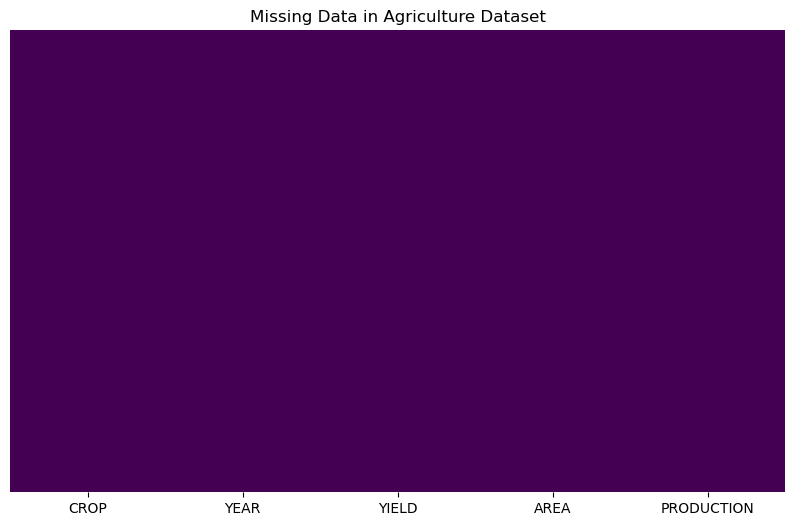

In [21]:
# Quick missing values visual check
plt.figure(figsize=(10, 6))
sns.heatmap(df_agriculture.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title("Missing Data in Agriculture Dataset")
plt.show()


# Phase 3 - Feature Engineering

In [22]:
import pandas as pd
import numpy as np

base_dir = "../data/Socioeconomic/clean_data/"

# Load datasets
df_agriculture = pd.read_csv(f"{base_dir}agricultural_yield_clean.csv")
df_population = pd.read_csv(f"{base_dir}population_data_clean.csv")
df_infrastructure = pd.read_csv(f"{base_dir}infrastructure_data_clean.csv")
df_economic_area = pd.read_csv(f"{base_dir}economic_loss_area_clean.csv")
df_economic_disaster = pd.read_csv(f"{base_dir}economic_loss_disaster_clean.csv")


### Feature Engineering: Agriculture 

In [23]:
# Normalize production and yield by area
df_agriculture['production_per_hectare'] = df_agriculture['PRODUCTION'] / df_agriculture['AREA']
df_agriculture['yield_anomaly'] = df_agriculture.groupby('CROP')['YIELD'].transform(lambda x: x - x.mean())

# Optional: Normalize yield within each crop
df_agriculture['yield_zscore'] = df_agriculture.groupby('CROP')['YIELD'].transform(lambda x: (x - x.mean()) / x.std())

display(df_agriculture.head())


,CROP,YEAR,YIELD,AREA,PRODUCTION,production_per_hectare,yield_anomaly,yield_zscore
0,OILSEED \n,1990,156310.0,92140.0,589.0,0.006392,-30611.5,-1.958744
1,OILSEED \n,1991,154570.0,87840.0,568.0,0.006466,-32351.5,-2.070082
2,OILSEED \n,1992,165240.0,93690.0,567.0,0.006052,-21681.5,-1.387338
3,OILSEED \n,1993,177486.0,107535.0,606.0,0.005635,-9435.5,-0.603751
4,OILSEED \n,1994,184460.0,116300.0,630.0,0.005417,-2461.5,-0.157504


### Feature Engineering: Population 

In [25]:
# Clean column names FIRST
df_population.columns = df_population.columns.str.strip()

# Create features
df_population['Population Density'] = df_population['Total Population'] / df_population['Area in Sq. KM']
df_population['Male-Female Ratio'] = df_population['Male'] / df_population['Female']
df_population['Household Size Ratio'] = df_population['Total Population'] / df_population['Households']

display(df_population.head())


,Districts,Households,Average Household Size,Male,Female,Area in Sq. KM,Total Population,Population Density,Male-Female Ratio,Household Size Ratio
0,Taplejung,26509,4.81,60552,66909,3646,127461,34.959133,0.904990,4.808216
1,Panchthar,41196,4.66,90186,101631,1241,191817,154.566479,0.887387,4.656204
2,Ilam,64502,4.50,141126,149128,1703,290254,170.436876,0.946341,4.499922
3,Jhapa,184552,4.40,385096,427554,1606,812650,506.008717,0.900696,4.403366
4,Morang,213997,4.51,466712,498658,1855,965370,520.415094,0.935936,4.511138


### Feature Engineering: Infrastructure

In [26]:
# Clean column names
df_infrastructure.columns = df_infrastructure.columns.str.strip()

# Infrastructure density metrics
df_infrastructure['Persons per Family'] = df_infrastructure['Total population'] / df_infrastructure['Total family number']
df_infrastructure['Persons per Household'] = df_infrastructure['Total population'] / df_infrastructure['Total household number']

display(df_infrastructure.head())


,District,Local Level Name,Total family number,Total household number,Total population,Total Male,Total Female,Persons per Family,Persons per Household
0,Taplejung,Aathrai Tribeni Rural Municipality,2869,2735,12288,6005,6283,4.283025,4.492870
1,Taplejung,Maiwakhola Rural Municipality,2275,2178,10365,5264,5101,4.556044,4.758953
2,Taplejung,Meringden Rural Municipality,2683,2528,12040,6181,5859,4.487514,4.762658
3,Taplejung,Mikwakhola Rural Municipality,1862,1792,7991,4000,3991,4.291622,4.459263
4,Taplejung,Phaktanglung Rural Municipality,2864,2700,11925,6239,5686,4.163757,4.416667


### Feature Engineering: Economic Loss

In [27]:
# Clean column names
df_economic_area.columns = df_economic_area.columns.str.strip()

# Calculate loss percentages
df_economic_area['% Land Affected'] = df_economic_area['Affected Area (ha)'] / df_economic_area['Total Area (ha)'] * 100
df_economic_area['Total Degradation'] = df_economic_area[['Soil Erosion', 'Chemical Degradation', 'Physical Degradation']].sum(axis=1)

display(df_economic_area.head())


,ECOLOGICAL BELT,Total Area (ha),Affected Area (ha),Percentage of affected area,Soil Erosion,Chemical Degradation,Physical Degradation,% Land Affected,Total Degradation
0,Mountain,213931.5,3512.3,1.64,1848.6,32.1,1631.6,1.641787,3512.3
1,Hill,986073.2,18764.5,1.90,11679.6,414.9,6670.0,1.902952,18764.5
2,Terai,1325634.5,34394.9,2.59,23643.4,1485.5,9266.0,2.594599,34394.9
3,Total,2525639.2,56671.7,2.24,37171.6,1932.5,17567.6,2.243856,56671.7


## Merge Datasets

In [28]:
# Clean merge keys
df_population['Districts'] = df_population['Districts'].str.strip()
df_infrastructure['District'] = df_infrastructure['District'].str.strip()

# Merge population and infrastructure
df_merged = pd.merge(df_population, df_infrastructure, left_on='Districts', right_on='District', how='inner')

# Drop redundant district columns
df_merged.drop(columns=['District'], inplace=True)

print("Merged data shape:", df_merged.shape)
display(df_merged.head())


Merged data shape: (729, 18)


,Districts,Households,Average Household Size,Male,Female,Area in Sq. KM,Total Population,Population Density,Male-Female Ratio,Household Size Ratio,Local Level Name,Total family number,Total household number,Total population,Total Male,Total Female,Persons per Family,Persons per Household
0,Taplejung,26509,4.81,60552,66909,3646,127461,34.959133,0.90499,4.808216,Aathrai Tribeni Rural Municipality,2869,2735,12288,6005,6283,4.283025,4.492870
1,Taplejung,26509,4.81,60552,66909,3646,127461,34.959133,0.90499,4.808216,Maiwakhola Rural Municipality,2275,2178,10365,5264,5101,4.556044,4.758953
2,Taplejung,26509,4.81,60552,66909,3646,127461,34.959133,0.90499,4.808216,Meringden Rural Municipality,2683,2528,12040,6181,5859,4.487514,4.762658
3,Taplejung,26509,4.81,60552,66909,3646,127461,34.959133,0.90499,4.808216,Mikwakhola Rural Municipality,1862,1792,7991,4000,3991,4.291622,4.459263
4,Taplejung,26509,4.81,60552,66909,3646,127461,34.959133,0.90499,4.808216,Phaktanglung Rural Municipality,2864,2700,11925,6239,5686,4.163757,4.416667


## Save Feature-Engineered Dataset

In [29]:
df_agriculture.to_csv(f"{base_dir}features_agriculture.csv", index=False)
df_population.to_csv(f"{base_dir}features_population.csv", index=False)
df_infrastructure.to_csv(f"{base_dir}features_infrastructure.csv", index=False)
df_economic_area.to_csv(f"{base_dir}features_economic_area.csv", index=False)
df_merged.to_csv(f"{base_dir}features_merged_districts.csv", index=False)

print("Feature-engineered datasets saved.")


Feature-engineered datasets saved.


# Phase 4. Machine Learning Model Development

In [30]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score

# Load dataset (example: merged by districts)
base_dir = "../data/Socioeconomic/clean_data/"
df = pd.read_csv(f"{base_dir}features_merged_districts.csv")

print("Data loaded. Shape:", df.shape)


Data loaded. Shape: (729, 18)


### Create Classification Target

In [31]:

threshold = df['Population Density'].median()
df['VULNERABLE'] = (df['Population Density'] > threshold).astype(int)


### Classification Pipeline

In [32]:
# Features and target
X = df[['Population Density', 'Household Size Ratio', 'Persons per Household']]
y = df['VULNERABLE']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00        77

    accuracy                           1.00       146
   macro avg       1.00      1.00      1.00       146
weighted avg       1.00      1.00      1.00       146

Confusion Matrix:
[[69  0]
 [ 0 77]]


### Regression Pipeline

In [33]:

df['Impact Ratio'] = df['Total population'] / df['Total household number']  

X_reg = df[['Population Density', 'Household Size Ratio']]
y_reg = df['Impact Ratio']

# Split
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Train regressor
reg = RandomForestRegressor(random_state=42)
reg.fit(X_train_r, y_train_r)

# Predict and evaluate
y_pred_r = reg.predict(X_test_r)
print("Regression RMSE:", np.sqrt(mean_squared_error(y_test_r, y_pred_r)))
print("R² Score:", r2_score(y_test_r, y_pred_r))


Regression RMSE: 0.49533481568058624
R² Score: 0.8503514629716594


## Time Series Analysis

In [35]:
df_agriculture = pd.read_csv(f"{base_dir}features_agriculture.csv")

# Average yield over time
yield_trend = df_agriculture.groupby('YEAR')['YIELD'].mean().reset_index()


### Forecasting with ARIMA 

In [37]:
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 15.6 MB/s eta 0:00:0000:010:01


In [42]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt

# Fit ARIMA model
model = ARIMA(ts, order=(1, 1, 1))
results = model.fit()

# Forecast next 5 years
forecast = results.forecast(steps=5)

# Create future date index
future_dates = pd.date_range(start=ts.index[-1] + pd.DateOffset(years=1), periods=5, freq='YS')
forecast.index = future_dates

# Print forecast table
forecast_df = pd.DataFrame({
    "Forecast Year": forecast.index.year,
    "Predicted Yield": forecast.values.round(2)
})
print(forecast_df)


/home/lokraj/OMDENA/capstone-project-lokraj/.conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/home/lokraj/OMDENA/capstone-project-lokraj/.conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/home/lokraj/OMDENA/capstone-project-lokraj/.conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


   Forecast Year  Predicted Yield
0           2014         84748.38
1           2015         86207.35
2           2016         87666.10
3           2017         89124.65
4           2018         90582.98


/home/lokraj/OMDENA/capstone-project-lokraj/.conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


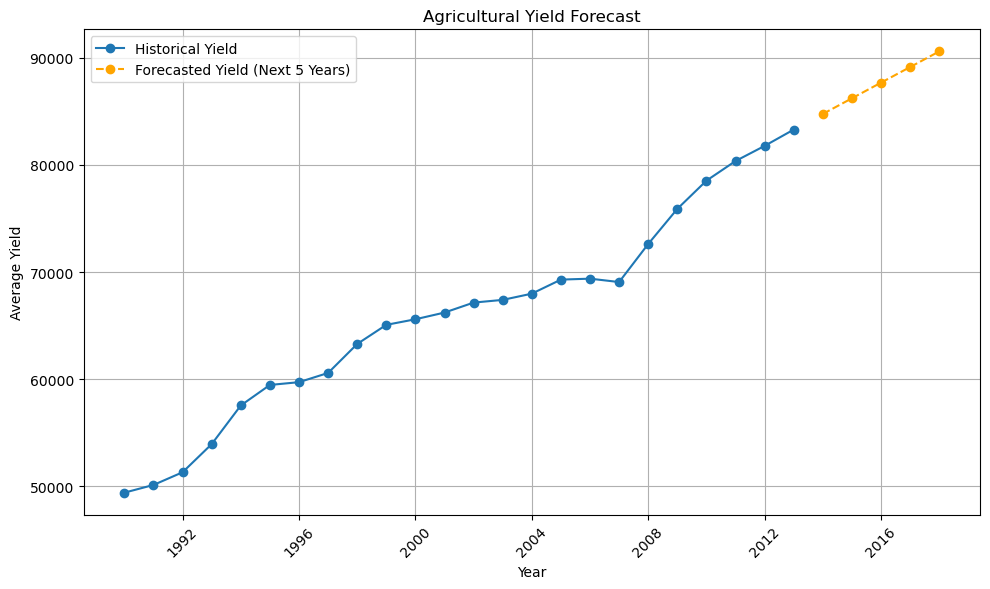

In [43]:
plt.figure(figsize=(10, 6))
plt.plot(ts.index, ts.values, label='Historical Yield', marker='o')
plt.plot(forecast.index, forecast.values, label='Forecasted Yield (Next 5 Years)', linestyle='--', marker='o', color='orange')
plt.title("Agricultural Yield Forecast")
plt.xlabel("Year")
plt.ylabel("Average Yield")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Economic Loss & Population Forecasting

<Axes: title={'center': 'Total Population Trend'}, xlabel='DATE', ylabel='Population'>

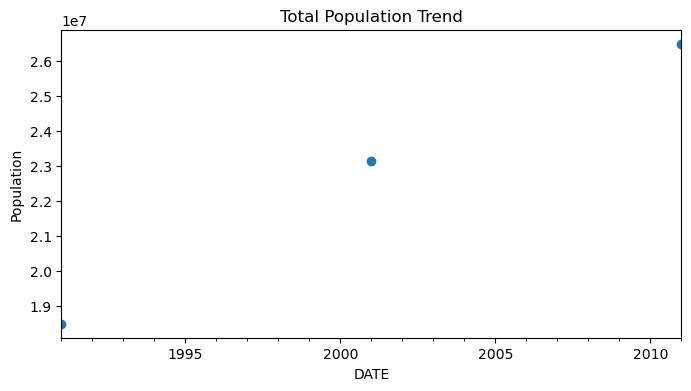

In [44]:
# Load cleaned population dataset
df_pop = pd.read_csv("../data/Socioeconomic/clean_data/population_data_clean.csv")



population_years = [1991, 2001, 2011]
population_values = [18491097, 23151423, 26494504]  # Replace with actual totals from your file

# Create time series
df_pop_trend = pd.DataFrame({'YEAR': population_years, 'POPULATION': population_values})
df_pop_trend['DATE'] = pd.to_datetime(df_pop_trend['YEAR'], format='%Y')
ts_pop = df_pop_trend.set_index('DATE')['POPULATION']
ts_pop = ts_pop.asfreq('YS')

ts_pop.plot(marker='o', title="Total Population Trend", ylabel="Population", figsize=(8,4))
